# Dimensionality Reduction Using PCA and SVD

Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of features (or dimensions) in a dataset while preserving the most important information. High-dimensional datasets can suffer from various challenges, such as increased computational complexity, overfitting, and difficulty in visualization and interpretation. Dimensionality reduction methods aim to address these issues by transforming or selecting a subset of features that capture the underlying patterns and variability in the data.

## __Applying Principal Component Analysis (PCA)__ ##

![PCA](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

## Step 1: Import the Necessary Libraries and Load Data set

- Import the **matplotlib.pyplot, pandas, NumPy, Seaborn,** and **sklearn** libraries
- Load the breast cancer data set from sklearn


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [31]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

__Observation:__
- The cancer DESCR has given us all the information regarding the cancer data set.

## Step 2: Create a DataFrame

- Create a DataFrame from the cancer data set


In [32]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [33]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


__Observation:__
- We can see a DataFrame with cancer data and feature names as columns.


## Step 3: Pre-process the Data

- Split the data into training and testing
- Instantiate a StandardScaler object and fit it to the data
- Transform the data using the StandardScaler object


In [34]:
SC = StandardScaler()

X =SC.fit_transform(df)
X[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

## Step 4: Apply PCA

- Import PCA from sklearn.decomposition
- Instantiate a PCA object with two components
- Fit PCA to the scaled data
- Transform the scaled data using PCA
- Check the shape of the transformed data


In [35]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)

In [36]:
pca_model.fit(X)

PCA(n_components=2)

In [37]:
X.shape

(569, 30)

In [38]:
X_PCA = pca_model.fit_transform(X)

In [40]:
print('Before PCA:',X.shape[1], 'dimensions')
print('After PCA:',X_PCA.shape[1], 'dimensions')

Before PCA: 30 dimensions
After PCA: 2 dimensions


Text(0, 0.5, 'PCA2')

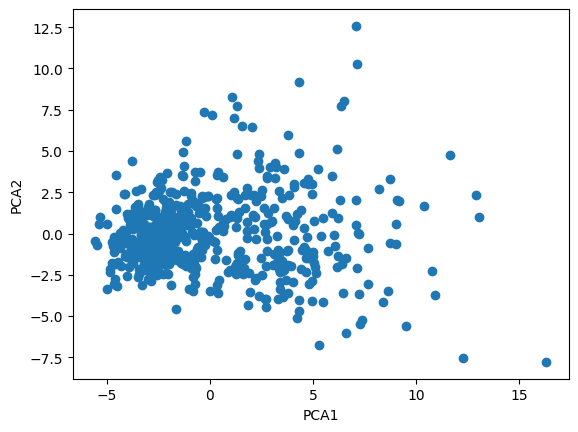

In [41]:
plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')

We can see the dimentionality reduction

## PCA Explained Variance Ratio

- The `explained_variance_ratio_` is an important attribute in Principal Component Analysis (PCA) that provides information about the amount of variance in the original data that is explained or captured by each principal component.

- When you perform PCA, the principal components are ordered in descending order of their ability to explain the variance in the data. The `explained_variance_ratio_` is a numpy array or list that contains the ratio (or percentage) of the total variance in the original data that is explained by each principal component.

- The sum of all the values in the `explained_variance_ratio_` array should be equal to 1 (or 100% if represented as percentages), as PCA aims to capture the total variance in the data using the principal components.


In [42]:
pca_full = PCA()
pca_full.fit(X)


PCA()

In [43]:
pca_full.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

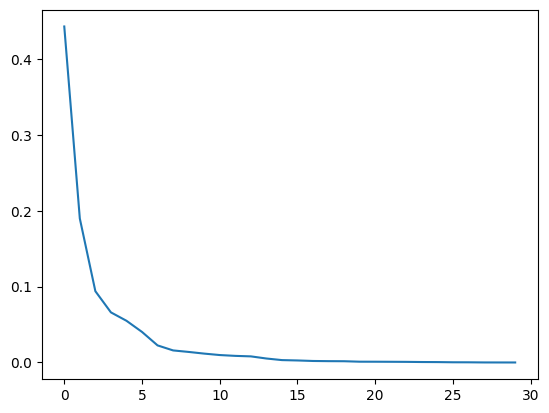

In [44]:
plt.plot(pca_full.explained_variance_ratio_)

In [45]:
np.cumsum(pca_full.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])


This means:

- The first principal component (PC1) explains 44.2% of the total variance in the original data.
- Adding the second principal component (PC2) will explain 63% of the variance.
- Adding the third principal component (PC3) will explain 73% of the variance and so on...

The `explained_variance_ratio_` is particularly useful when you want to determine how many principal components to retain in your analysis. A common approach is to choose the number of components that explain a certain cumulative percentage of the variance, such as 95% or 99%.

For example, in the case above, if you want to retain components that explain at least 95% of the variance, you would need to keep the first three principal components (PC1, PC2, and PC3), as their cumulative `explained_variance_ratio_` is 0.45 + 0.25 + 0.15 = 0.85 (85%).

By analyzing the `explained_variance_ratio_`, you can strike a balance between retaining enough components to capture a significant amount of the variance in the data while also reducing the dimensionality of the data for computational efficiency or interpretability purposes.

It's important to note that the `explained_variance_ratio_` should be interpreted in conjunction with domain knowledge and other evaluation metrics, as retaining too few components may result in the loss of important information, while retaining too many components may lead to overfitting or noise in the data.

''

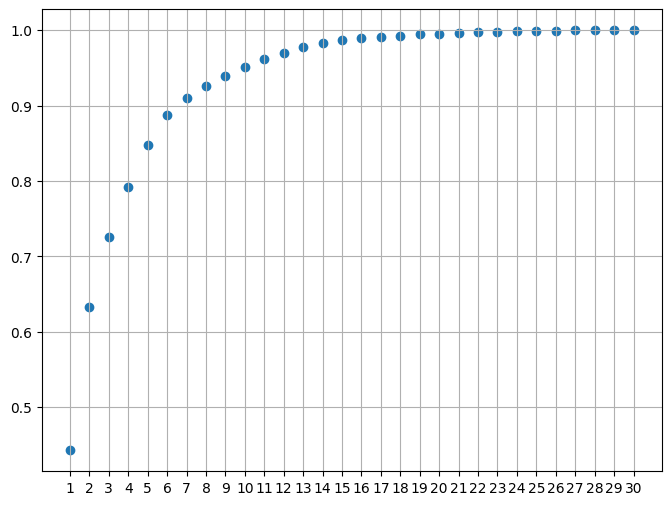

In [56]:
plt.figure(figsize=(8,6))
#plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.scatter(range(1,31),np.cumsum(pca_full.explained_variance_ratio_))
plt.xticks(range(1,31))
plt.grid()
;

## Step 5: Visualize the PCA Results

- Create a scatter plot of the two principal components, with the target variable as color

Text(0, 0.5, 'Second Principal Component')

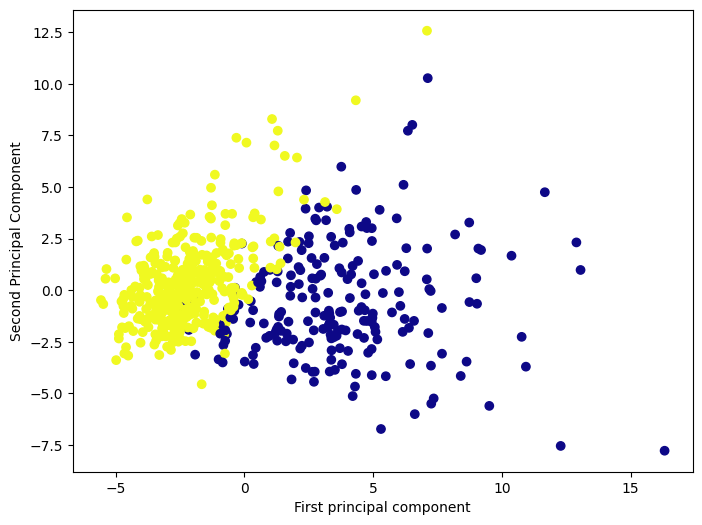

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data_pca[:,0],scaled_data_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Texture')

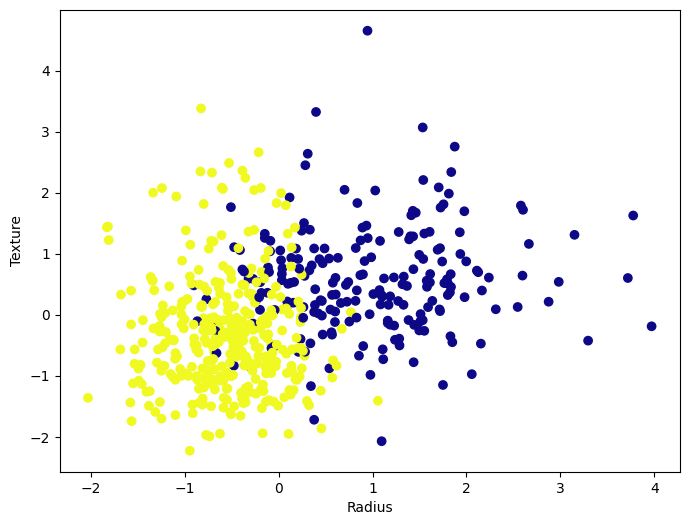

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Radius')
plt.ylabel('Texture')

## Step 6: Analyze the PCA Components

- Display the PCA component matrix
- Display the explained variance


In [41]:
# Get the loadings (eigenvectors)
loadings = pca_model.components_

# Print the loadings for the first and second principal components
print("Loadings for Principal Component 1:\n", loadings[0])
print("Loadings for Principal Component 2:\n", loadings[1])

Loadings for Principal Component 1:
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Loadings for Principal Component 2:
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [43]:
loadings_df = pd.DataFrame(loadings,columns=df.columns)
loadings_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In the `loadings` matrix, each row corresponds to a principal component, and each column corresponds to an original feature. The values in the matrix indicate the contribution (weight) of each original feature to each principal component.

- Basically PCA helps you understand the correlation clustering of all of your features
- 13.3 is very high (above 10)

If the loadings in your PCA results are consistently low across all components, it could imply several things:

1. **Low Variability in Original Features:**
   - The original features may not exhibit much variability or covariance, making it challenging for PCA to identify strong patterns.

2. **Data Standardization:**
   - Ensure that your data is standardized (mean-centered and scaled). Standardization is crucial for PCA, as it gives equal weight to all features.

3. **Linear Relationships:**
   - PCA assumes linear relationships between variables. If your data has non-linear relationships, PCA might not capture them well.

4. **Too Few Principal Components:**
   - Consider using more principal components. If you've only considered a few components, try using a larger number to see if more variance can be explained.

5. **Sparse Data:**
   - If your dataset is sparse (contains a lot of zeros), PCA might not perform well. Preprocessing techniques or other dimensionality reduction methods might be more suitable.

6. **Small Sample Size:**
   - For very small datasets, PCA might not provide meaningful results. Increasing your dataset size could improve the performance of PCA.

7. **Multicollinearity:**
   - If there's high multicollinearity among features, PCA might struggle to identify distinct patterns. In such cases, addressing multicollinearity before PCA could be beneficial.

### Steps to Address Low Loadings:

1. **Check Data Quality:**
   - Inspect the data for missing values, outliers, or extreme values that might impact the results.

2. **Data Transformation:**
   - If your data is highly skewed or not normally distributed, consider applying appropriate transformations before performing PCA.

3. **Feature Engineering:**
   - Explore creating new features that might better capture patterns in the data.

4. **Consider Other Techniques:**
   - PCA might not be the best choice for all datasets. Consider trying other dimensionality reduction techniques, such as t-SNE or UMAP.

5. **Domain Knowledge:**
   - Leverage domain knowledge to understand if PCA is suitable for your specific problem. In some cases, it might not be the most appropriate method.

6. **Consultation:**
   - Seek advice from domain experts or statisticians to ensure that your approach aligns with best practices.

Remember that PCA is just one tool, and its effectiveness can vary based on the nature of your data. Experiment with different approaches and preprocessing steps to identify what works best for your specific dataset and analysis goals.

The concept of a "high" variance value in PCA (Principal Component Analysis) can vary depending on the context of your data and the specific goals of your analysis. There is no universally defined threshold for what constitutes a high variance value because it depends on factors such as the nature of the data, the dimensionality of the original space, and the level of detail you wish to retain.

In PCA, the explained variance of a principal component is a measure of how much of the total variability in the data is captured by that component. Generally, higher explained variance values indicate that the principal component is able to capture a larger proportion of the original data's variability.



Some general guidelines to consider when interpreting variance values in PCA:

1. **Magnitude Comparison**: You can compare the explained variance values of different principal components. If one principal component has a significantly higher explained variance compared to others, it might be considered to have a relatively high variance.

2. **Total Variance Captured**: The sum of the explained variance values for all principal components represents the total amount of variance captured by the chosen components. You can consider how much of the total variance is explained by the components you retain. A common rule of thumb is to retain principal components that collectively explain a significant percentage of the total variance, such as 95% or 99%.

3. **Domain Knowledge**: Your understanding of the domain and the nature of the data can help you determine what constitutes a high variance value. In some cases, even a relatively modest explained variance might be sufficient to retain important information.

4. **Dimensionality Reduction Goals**: If your goal is dimensionality reduction (reducing the number of features), you might focus on retaining a sufficient amount of total variance while reducing the number of dimensions.

5. **Scree Plot**: Plotting the explained variance against the number of principal components can help you visually identify an "elbow point" where the explained variance starts to level off. This can provide insights into how many principal components to retain.

Remember that PCA is often used to simplify data while preserving as much information as possible. The choice of how many principal components to retain and what constitutes a high variance value depends on your specific analysis objectives, the trade-offs between dimensionality reduction and information retention, and the context of the problem you're addressing.

___

## __Applying Singular Value Decomposition (SVD)__ 

In [ ]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


## Step 2: Perform Singular Value Decomposition (SVD) on the Dataset

- Create the column space of the data, U, and the row space of the data, V
- Calculate the SVD using NumPy
- Display the V matrix


In [ ]:
import numpy as np

U, sigma, V = np.linalg.svd(post_words)
print(np.round(V, decimals=2))

[[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


__Observation:__
- The diagonal values in **sigma** are always in descending order, and you can see that the vectors are also placed in that corresponding order.

In [ ]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

## Step 3: Approximate the Original Dataset Using the First Two Components

- Calculate the approximate dataset using the first two components
- Display the approximation and the error from the actual values


In [ ]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946


__Observation:__
- Here, A was calculated using only the first two components, and we got an approximate A by multiplying the matrix U and V.

In [ ]:
print("\nError from actual value:\n")
print(post_words - A_approx)


Error from actual value:

          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


__Observation:__
- Here, we can see the difference from the actual by the approximate value of A.

## Step 4: Visualize the V Matrix as an Image

- Import matplotlib.pyplot
- Plot the V matrix as an image
- Pass the c_names values to the xticks and the words to the yticks
- Initialize ax
- Declare the title as SVD
- Plot the colorbar


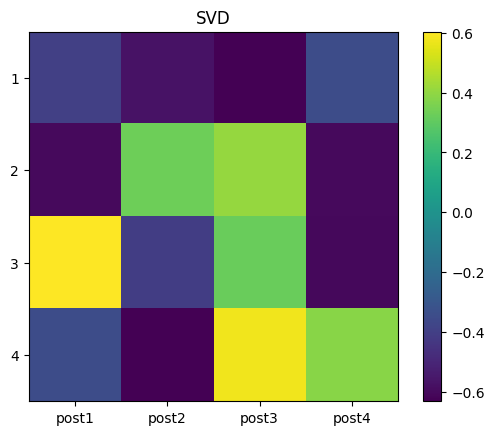

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("SVD")
plt.colorbar();

__Observations:__
- Here, we can see the singular value decomposition plot.
- Notice that the lighter blue of post 1 and post 4 of row 1 have similar values.

## Step 5: Analyze the U Matrix

- Display the second column of the U matrix


In [ ]:
pd.DataFrame(U[:,1], index=words)

,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


__Observations:__
- Here, we can see that snow and tahoe are identical, whereas goal and puck have similar values.

__Conclusion__

This is how we can apply single value decomposition, or SVD.

Here is a comparison of Singular Value Decomposition (SVD) and Principal Component Analysis (PCA):

| Feature | SVD | PCA |
|---|---|---|
| Purpose | SVD is a general factorization technique that can be used for a variety of purposes, including dimensionality reduction, data compression, and signal processing. PCA is a specific type of SVD that is designed for dimensionality reduction. | PCA is a statistical procedure that is used to reduce the dimensionality of a dataset while retaining as much of the variation in the data as possible. |
| Assumptions | SVD makes no assumptions about the data. PCA assumes that the data is centered and has a covariance matrix that is positive semi-definite. | PCA assumes that the data is centered and has a covariance matrix that is positive semi-definite. |
| Output | SVD produces a set of orthonormal vectors and a diagonal matrix of singular values. PCA produces a set of principal components, which are a linear combination of the original variables. | PCA produces a set of principal components, which are a linear combination of the original variables. The principal components are ordered by decreasing variance. |
| Computational complexity | SVD is computationally more expensive than PCA. | PCA is computationally less expensive than SVD. |
| Applications | SVD is used in a variety of applications, including image compression, signal processing, and machine learning. PCA is used in a variety of applications, including dimensionality reduction, data visualization, and machine learning. |

In general, PCA is a more efficient and easier to implement algorithm than SVD. However, SVD is more flexible and can be used for a wider variety of purposes.

Here is a table that summarizes the pros and cons of SVD and PCA:

| Feature | SVD | PCA |
|---|---|---|
| Pros | Flexible, can be used for a variety of purposes | Efficient, easy to implement |
| Cons | Computationally expensive | Not as flexible as SVD |

Ultimately, the best choice of algorithm will depend on the specific application.